In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
def read_excel(file_path):
    df = pd.read_excel(file_path)

    df = df.drop_duplicates()
    return df

In [ ]:
df = read_excel('db.xlsx')

In [ ]:
df.shape

(35334, 14)

In [ ]:
df.head()

,INVOICE NO,INVOICE DATE,CUST CODE,CUST NAME,STATE,PRODUCT GROUP NAME,ITEM GROUP NAME,ITEM TYPE NAME,ITEM CODE,ITEM NAME,ITEM DESC.,BRAND NAME,QTY,PRICE
0,PS/08003-000/VA000043,2018-01-06,CAS020,CASH (SBY),JAWA TIMUR,AUTOMOTIVE,FILTER,OIL FILTER,C-1804,15208-W1116,(15208-W1116) - OIL FILTER,SAKURA,3,51200
1,PS/08003-000/VA000046,2018-01-06,CAS020,CASH (SBY),JAWA TIMUR,AUTOMOTIVE,FILTER,FUEL FILTER,FC-1805,16403-99002=,(16403-99002) - FUEL FILTER,SAKURA,4,51100
2,PS/08003-000/VA000057,2018-01-06,CAS020,CASH (SBY),JAWA TIMUR,HEAVY DUTY,FILTER,FUEL FILTER,P55-3004,J86-20731=,(J86-20731) - FUEL FILTER,DONALDSON,2,51600
3,PS/08003-000/VA000350,2018-01-06,JEM003,PT. JEMBER INDAH JAYA,JAWA TIMUR,AUTOMOTIVE,FILTER,AIR FILTER,A-1007,MT 421158,(MT 421158) - AIR FILTER,SAKURA,5,52200
4,PS/08003-000/VA000057,2018-01-06,CAS020,CASH (SBY),JAWA TIMUR,HEAVY DUTY,FILTER,OIL FILTER,P55-8616,J86-10345,(J86-10345) - OIL FILTER,DONALDSON,2,52900


In [ ]:
# Check duplicate
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35334 entries, 0 to 35340
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   INVOICE NO          35334 non-null  object        
 1   INVOICE DATE        35334 non-null  datetime64[ns]
 2   CUST CODE           35334 non-null  object        
 3   CUST NAME           35334 non-null  object        
 4   STATE               35334 non-null  object        
 5   PRODUCT GROUP NAME  35334 non-null  object        
 6   ITEM GROUP NAME     35334 non-null  object        
 7   ITEM TYPE NAME      35334 non-null  object        
 8   ITEM CODE           35334 non-null  object        
 9   ITEM NAME           35334 non-null  object        
 10  ITEM DESC.          35334 non-null  object        
 11  BRAND NAME          35334 non-null  object        
 12  QTY                 35334 non-null  int64         
 13  PRICE               35334 non-null  int64     

**Exploratory Data Analysis**

In [ ]:
eda_data = df.copy()

# Validate data copy
print('Original:',df.shape)
print('Copy:',eda_data.shape)

Original: (35334, 14)
Copy: (35334, 14)


**EDA - 1**

In [ ]:
# Description
eda_data.describe()

,QTY,PRICE
count,35334.000000,3.533400e+04
mean,14.343041,2.044396e+05
std,32.509309,3.898415e+05
min,1.000000,4.990000e+04
25%,2.000000,7.300000e+04
50%,5.000000,1.032000e+05
75%,12.000000,1.924750e+05
max,1500.000000,6.870600e+06


In [ ]:
# Check missing value
eda_data.isna().sum()

INVOICE NO            0
INVOICE DATE          0
CUST CODE             0
CUST NAME             0
STATE                 0
PRODUCT GROUP NAME    0
ITEM GROUP NAME       0
ITEM TYPE NAME        0
ITEM CODE             0
ITEM NAME             0
ITEM DESC.            0
BRAND NAME            0
QTY                   0
PRICE                 0
dtype: int64

In [ ]:
# Check cust code

len(set(eda_data['CUST CODE']))

509

In [ ]:
min_date = eda_data['INVOICE DATE'].min()
max_date = eda_data['INVOICE DATE'].max()

print(f'First Transaction Date: {min_date}')
print(f'Last Transaction Date: {max_date}')

First Transaction Date: 2016-02-06 00:00:00
Last Transaction Date: 2019-03-31 00:00:00


**Create RFM Features**

In [ ]:
latest_date = pd.to_datetime('2019-07-23')

latest_date

Timestamp('2019-07-23 00:00:00')

In [ ]:
def cal_recency(x): # Calculate recency
    return (latest_date - x.max()).days

def cal_tenure(x): # Calculate tenure
    return (x.max() - x.min()).days

def cal_frequency(x): # Calculate frequency
    return len(set(x))

def rfmt(df):
    df['TOTAL'] = df['QTY'] * df['PRICE']

    agg_dict = {
        'INVOICE DATE': [cal_recency, cal_tenure],
        'INVOICE NO': cal_frequency,
        'TOTAL': 'sum'
    }
    data_rfm = df.groupby('CUST CODE').agg(agg_dict)
    data_rfm.columns = ['Recency', 'Tenure', 'Frequency', 'Monetary']

    return data_rfm


In [ ]:
eda_rfm_data = rfmt(df=eda_data)

# Validate
assert eda_rfm_data.shape[0] == eda_data['CUST CODE'].nunique()

print('RFM data shape:', eda_rfm_data.shape)
eda_rfm_data.head()

RFM data shape: (509, 4)


,Recency,Tenure,Frequency,Monetary
CUST CODE,,,,
AAJ002,173,337,19,9246600
ABA008,380,0,1,349700
ACH002,234,317,13,6549600
ACH003,212,318,46,85980500
ADI007,934,122,2,2255300


**EDA - 2**


In [ ]:
eda_rfm_data.describe()

,Recency,Tenure,Frequency,Monetary
count,509.000000,509.000000,509.000000,5.090000e+02
mean,317.137525,218.781925,34.827112,1.266444e+08
std,211.344069,194.589841,157.251809,6.710974e+08
min,114.000000,0.000000,1.000000,5.750000e+04
25%,173.000000,11.000000,2.000000,2.200800e+06
50%,235.000000,245.000000,7.000000,9.852000e+06
75%,397.000000,334.000000,21.000000,4.423190e+07
max,1229.000000,1095.000000,2886.000000,9.115633e+09


In [ ]:
eda_rfm_data[eda_rfm_data['Frequency'] == 1] # Check Frequency

,Recency,Tenure,Frequency,Monetary
CUST CODE,,,,
ABA008,380,0,1,349700
ADI011,528,0,1,2956000
AGR003,844,0,1,1528600
ARG003,934,0,1,990600
ASI001,517,0,1,2200800
...,...,...,...,...
TUN024,402,0,1,205200
UNG003,559,0,1,172400
USA007,691,0,1,2620000


In [ ]:
eda_rfm_data[eda_rfm_data['Tenure'] == 0].sample(5)

,Recency,Tenure,Frequency,Monetary
CUST CODE,,,,
GOL004,419,0,1,1792800
DUN009,437,0,1,2354200
SIN019,661,0,1,4400800
DUT007,265,0,1,1800600
ADI011,528,0,1,2956000


In [ ]:
eda_rfm_data[eda_rfm_data['Frequency'] == 1]['Monetary'].describe()

count    1.210000e+02
mean     2.316110e+06
std      4.163298e+06
min      5.750000e+04
25%      5.600000e+05
50%      1.278700e+06
75%      2.517600e+06
max      3.639400e+07
Name: Monetary, dtype: float64

In [ ]:
eda_rfm_data = eda_rfm_data[eda_rfm_data['Frequency'] >= 2] # exclude one time buyer

# validate
eda_rfm_data.describe()

,Recency,Tenure,Frequency,Monetary
count,388.000000,388.000000,388.000000,3.880000e+02
mean,250.381443,287.010309,45.376289,1.654169e+08
std,143.929888,173.410924,178.858389,7.647483e+08
min,114.000000,0.000000,2.000000,2.382000e+05
25%,173.000000,192.750000,4.750000,5.383000e+06
50%,215.000000,304.000000,11.000000,1.862100e+07
75%,283.000000,335.000000,31.000000,7.216920e+07
max,1026.000000,1095.000000,2886.000000,9.115633e+09


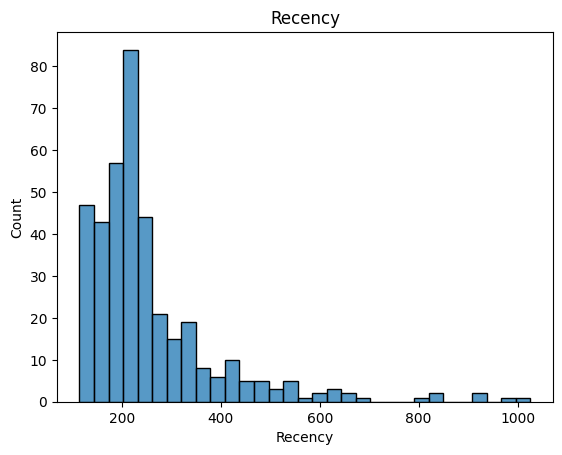

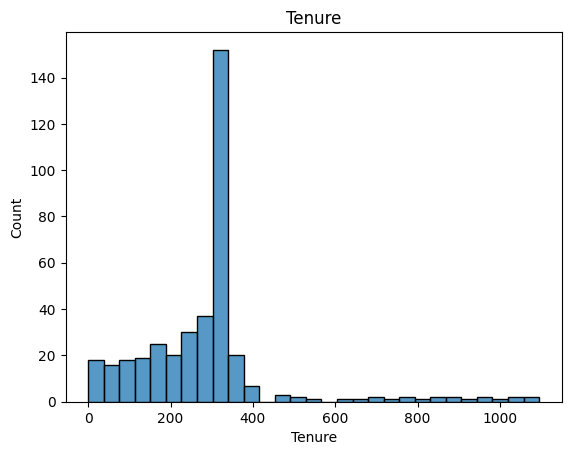

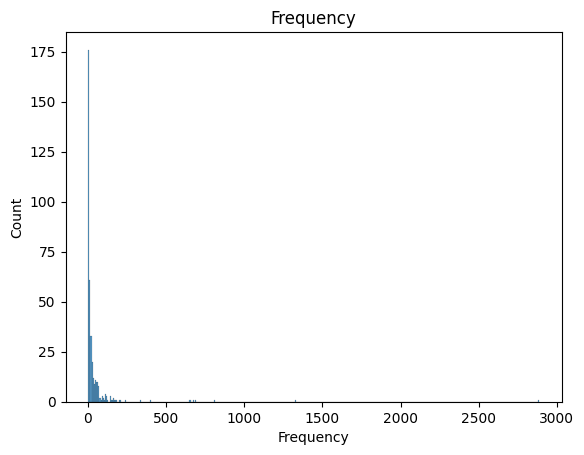

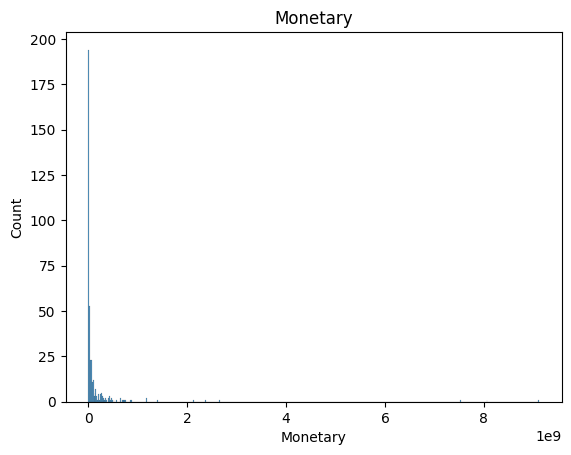

In [ ]:
# CHeck data distribution
for col in eda_rfm_data.columns:
    x = eda_rfm_data[col]
    sns.histplot(x)
    plt.title(col)
    plt.show();

In [ ]:

def drop_outlier(df, cols):
    data_clean = df.copy()

    # Create subplots
    fig, axes = plt.subplots(len(cols), 2, figsize=(12, 8))

    # Before
    for i, col in enumerate(cols):
        axes[i, 0].boxplot(df[col])
        axes[i, 0].set_title(f'{col} (Before)')
        axes[i, 0].set_ylabel(col)

    for col in cols:
        q1, q3 = np.quantile(data_clean[col], q=[0.25, 0.75])
        iqr = q3 - q1
        ub = q3 + 1.5 * iqr
        lb = q1 - 1.5 * iqr

        cond_data_1 = data_clean[col] <= ub
        cond_data_2 = data_clean[col] >= lb
        data_clean = data_clean[cond_data_1 & cond_data_2]

    # After
    for i, col in enumerate(cols):
        axes[i, 1].boxplot(data_clean[col])
        axes[i, 1].set_title(f'{col} (After)')
        axes[i, 1].set_ylabel(col)

    plt.tight_layout()
    plt.show()

    return data_clean

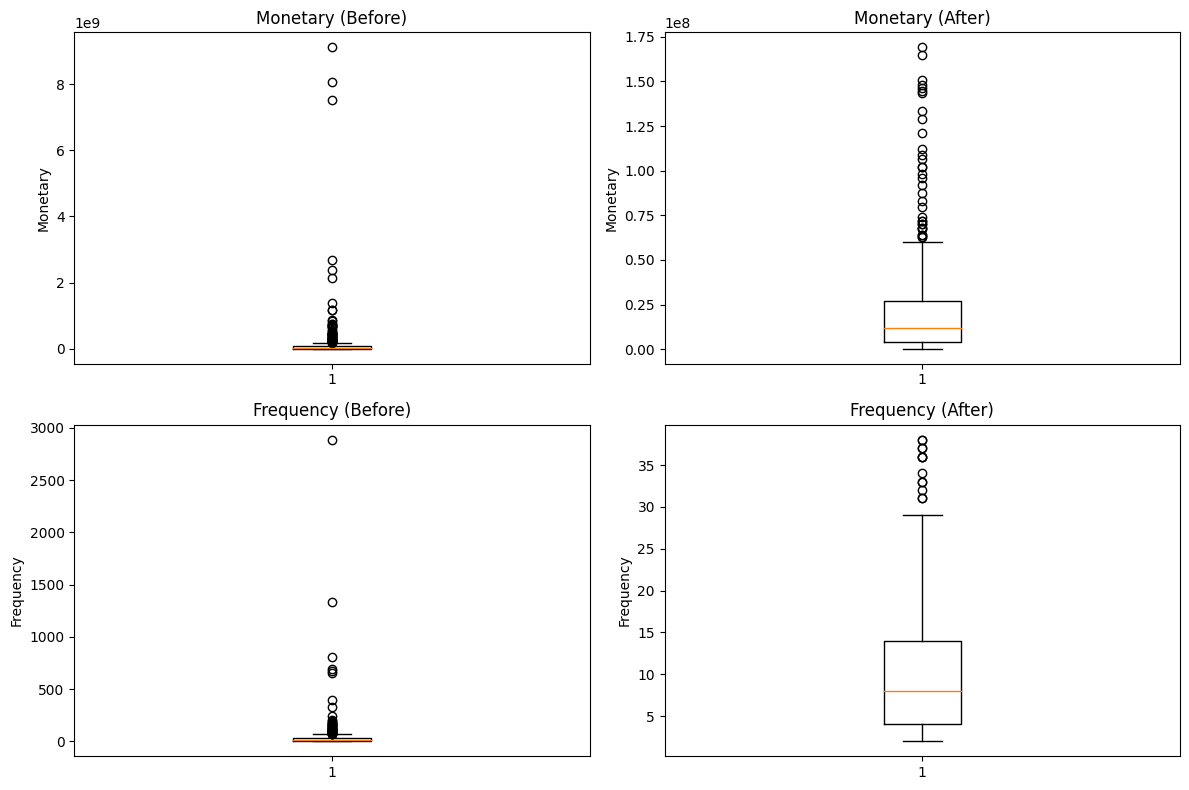

EDA data shape : (298, 4)


,Recency,Tenure,Frequency,Monetary
count,298.000000,298.000000,298.000000,2.980000e+02
mean,281.694631,258.600671,10.385906,2.363411e+07
std,149.135751,162.555367,8.665622,3.220031e+07
min,114.000000,0.000000,2.000000,2.382000e+05
25%,204.000000,153.000000,4.000000,3.733975e+06
50%,235.000000,272.000000,8.000000,1.156830e+07
75%,323.000000,328.750000,14.000000,2.701790e+07
max,1026.000000,1034.000000,38.000000,1.690760e+08


In [ ]:
# Remove outlier
eda_rfm_data = drop_outlier(df = eda_rfm_data,
                            cols = ['Monetary', 'Frequency'])

# Validate
print('EDA data shape :', eda_rfm_data.shape)
eda_rfm_data.describe()

**Data Preprocessing**

In [ ]:
def preprocess_raw(df):
    data_raw = df.dropna(subset=['CUST CODE'])

    data_rfm = rfmt(df=data_raw)

    assert data_rfm.shape[0] == data_raw['CUST CODE'].nunique()
    print('RFM data shape:', data_rfm.shape)

    return data_rfm

In [ ]:
data_rfm = preprocess_raw(df = eda_data)

data_rfm.head()

RFM data shape: (509, 4)


,Recency,Tenure,Frequency,Monetary
CUST CODE,,,,
AAJ002,173,337,19,9246600
ABA008,380,0,1,349700
ACH002,234,317,13,6549600
ACH003,212,318,46,85980500
ADI007,934,122,2,2255300


In [ ]:
def preprocess_rfm(data_rfm):
    data_freq = data_rfm[data_rfm['Frequency'] >= 2]
    data_clean = drop_outlier(data_freq, ['Monetary', 'Frequency'])
    data_clean = data_clean[['Recency', 'Frequency', 'Monetary']]
    print('Data shape:', data_clean.shape)
    return data_clean

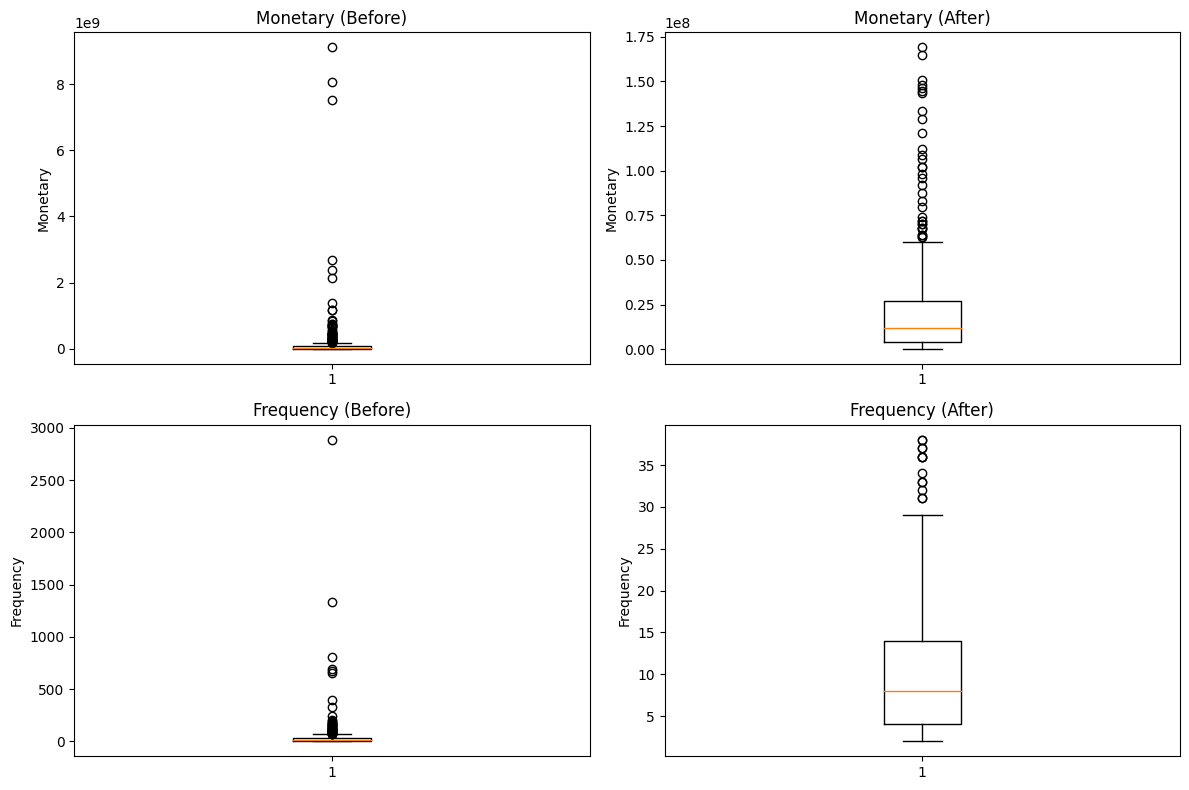

Data shape: (298, 3)


,Recency,Frequency,Monetary
count,298.000000,298.000000,2.980000e+02
mean,281.694631,10.385906,2.363411e+07
std,149.135751,8.665622,3.220031e+07
min,114.000000,2.000000,2.382000e+05
25%,204.000000,4.000000,3.733975e+06
50%,235.000000,8.000000,1.156830e+07
75%,323.000000,14.000000,2.701790e+07
max,1026.000000,38.000000,1.690760e+08


from matplotlib import pyplot as plt
_df_0['Recency'].plot(kind='hist', bins=20, title='Recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Frequency'].plot(kind='hist', bins=20, title='Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Monetary'].plot(kind='hist', bins=20, title='Monetary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Recency', y='Frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Frequency', y='Monetary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Recency'].plot(kind='line', figsize=(8, 4), title='Recency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Frequency'].plot(kind='line', figsize=(8, 4), title='Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Monetary'].plot(kind='line', figsize=(8, 4), title='Monetary')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
data_rfm_clean = preprocess_rfm(data_rfm = data_rfm)
data_rfm_clean.describe()

**Normalize**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def fit_scaler(df):
    # Create & fit scaler
    scaler = MinMaxScaler()
    scaler.fit(df)

    return scaler

def transform_scaler(df, scaler):
    # Transform scaler
    data_clean = pd.DataFrame(scaler.transform(df))
    data_clean.index = df.index
    data_clean.columns = df.columns

    # Validate
    print("Data shape :", df.shape)

    return data_clean

In [ ]:
scaler = fit_scaler(df = data_rfm_clean)
data_rfm_scaled = transform_scaler(df = data_rfm_clean,
                                   scaler = scaler)

data_rfm_scaled.head()

Data shape : (298, 3)


,Recency,Frequency,Monetary
CUST CODE,,,
AAJ002,0.064693,0.472222,0.053355
ACH002,0.131579,0.305556,0.037381
ADI007,0.899123,0.000000,0.011947
ADI012,0.201754,0.027778,0.072627
AGU020,0.199561,0.000000,0.005540


In [ ]:
data_rfm_scaled.describe()

,Recency,Frequency,Monetary
count,298.000000,298.000000,298.000000
mean,0.183876,0.232942,0.138570
std,0.163526,0.240712,0.190717
min,0.000000,0.000000,0.000000
25%,0.098684,0.055556,0.020705
50%,0.132675,0.166667,0.067106
75%,0.229167,0.333333,0.158612
max,1.000000,1.000000,1.000000


**Preprocessing Pipeline**

In [ ]:
def preprocess_data(df, scaler=None):
    data_rfm = preprocess_raw(df)

    data_rfm_clean = preprocess_rfm(data_rfm)

    if scaler is None:
        scaler = fit_scaler(data_rfm_clean)

    data_clean = transform_scaler(data_rfm_clean, scaler)

    # Validate
    print('Data shape clean:', data_clean.shape)

    return data_clean, scaler

RFM data shape: (509, 4)


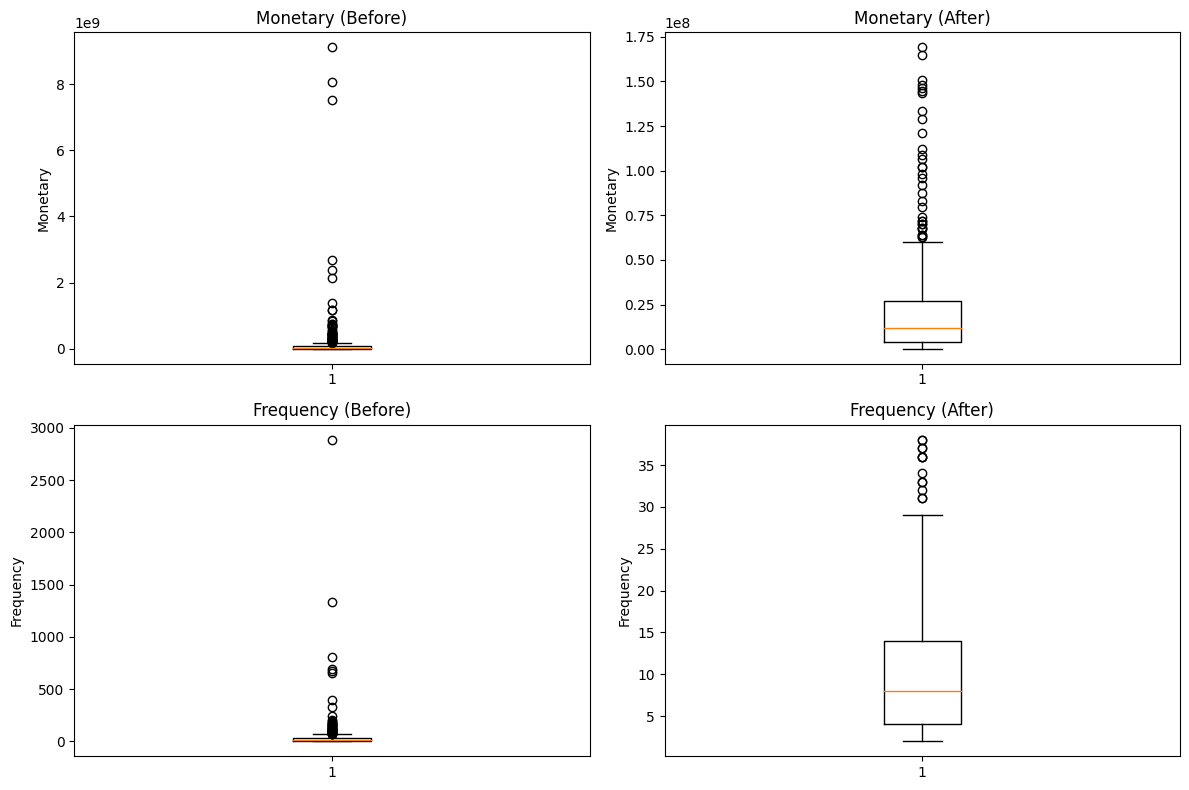

Data shape: (298, 3)
Data shape : (298, 3)
Data shape clean: (298, 3)


In [ ]:
data_clean, scaler = preprocess_data(df)

In [ ]:
data_clean.head()

,Recency,Frequency,Monetary
CUST CODE,,,
AAJ002,0.064693,0.472222,0.053355
ACH002,0.131579,0.305556,0.037381
ADI007,0.899123,0.000000,0.011947
ADI012,0.201754,0.027778,0.072627
AGU020,0.199561,0.000000,0.005540


In [ ]:
data_clean.describe()

,Recency,Frequency,Monetary
count,298.000000,298.000000,298.000000
mean,0.183876,0.232942,0.138570
std,0.163526,0.240712,0.190717
min,0.000000,0.000000,0.000000
25%,0.098684,0.055556,0.020705
50%,0.132675,0.166667,0.067106
75%,0.229167,0.333333,0.158612
max,1.000000,1.000000,1.000000


**Clustering**

**1. Ranking**

In [ ]:
data_bin = data_clean.copy()

In [ ]:
def binning_rfm(df):
    quantiles = df.quantile(q=[0.2, 0.4, 0.6, 0.8])

    bins = {col: [-np.inf] + list(quantiles[col]) + [np.inf] for col in df.columns}
    labels = [1, 2, 3, 4, 5]

    for col in df.columns:
        df[f'{col[0]}_Group'] = pd.cut(df[col], bins=bins[col], labels=labels).astype(int)

    # RFM score with average
    df['RFM_Score'] = (df['R_Group'] + df['F_Group'] + df['M_Group']) / 3

    return df


In [ ]:
data_bin = binning_rfm(data_bin)

In [ ]:
data_bin.head()

,Recency,Frequency,Monetary,R_Group,F_Group,M_Group,RFM_Score
CUST CODE,,,,,,,
AAJ002,0.064693,0.472222,0.053355,1,5,3,3.000000
ACH002,0.131579,0.305556,0.037381,3,4,2,3.000000
ADI007,0.899123,0.000000,0.011947,5,1,1,2.333333
ADI012,0.201754,0.027778,0.072627,4,1,3,2.666667
AGU020,0.199561,0.000000,0.005540,4,1,1,2.000000


In [ ]:
data_bin.dtypes

Recency      float64
Frequency    float64
Monetary     float64
R_Group        int64
F_Group        int64
M_Group        int64
RFM_Score    float64
dtype: object

In [ ]:
data_bin.describe()

,Recency,Frequency,Monetary,R_Group,F_Group,M_Group,RFM_Score
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,0.183876,0.232942,0.138570,2.956376,2.909396,3.000000,2.955257
std,0.163526,0.240712,0.190717,1.454626,1.395705,1.418967,0.712412
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.098684,0.055556,0.020705,2.000000,2.000000,2.000000,2.333333
50%,0.132675,0.166667,0.067106,3.000000,3.000000,3.000000,3.000000
75%,0.229167,0.333333,0.158612,4.000000,4.000000,4.000000,3.333333
max,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
def assign_segment(rfm_df):
    labels = ['At Risk', 'Low Performance',
              'Average Performance', 'High Performance',
              'Top Customers']

    rfm_df['Segment'] = pd.cut(rfm_df['RFM_Score'],
                               bins = [0, 1, 2, 3, 4, 5],
                               labels = labels)
    return rfm_df

In [ ]:
data_bin = assign_segment(data_bin)

In [ ]:
data_bin.head()

,Recency,Frequency,Monetary,R_Group,F_Group,M_Group,RFM_Score,Segment
CUST CODE,,,,,,,,
AAJ002,173.0,19.0,9246600.0,1,5,3,3.000000,Average Performance
ACH002,234.0,13.0,6549600.0,3,4,2,3.000000,Average Performance
ADI007,934.0,2.0,2255300.0,5,1,1,2.333333,Average Performance
ADI012,298.0,3.0,12500400.0,4,1,3,2.666667,Average Performance
AGU020,296.0,2.0,1173600.0,4,1,1,2.000000,Low Performance


from matplotlib import pyplot as plt
_df_8['Recency'].plot(kind='hist', bins=20, title='Recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Frequency'].plot(kind='hist', bins=20, title='Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Monetary'].plot(kind='hist', bins=20, title='Monetary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['R_Group'].plot(kind='hist', bins=20, title='R_Group')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='Recency', y='Frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13.plot(kind='scatter', x='Frequency', y='Monetary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14.plot(kind='scatter', x='Monetary', y='R_Group', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15.plot(kind='scatter', x='R_Group', y='F_Group', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Recency'].plot(kind='line', figsize=(8, 4), title='Recency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Frequency'].plot(kind='line', figsize=(8, 4), title='Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Monetary'].plot(kind='line', figsize=(8, 4), title='Monetary')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['R_Group'].plot(kind='line', figsize=(8, 4), title='R_Group')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
rfm_with_segment = assign_segment(data_bin)
result = rfm_with_segment[['Recency', 'Monetary', 'Frequency', 'Segment']] \
    .groupby('Segment') \
    .agg({'min', 'max', 'mean', 'std'})

result

Recency                                 Monetary  \
                            std    min     max        mean           std   
Segment                                                                    
At Risk                0.000000  173.0   173.0  173.000000  2.904088e+05   
Low Performance       57.473508  145.0   335.0  236.342105  5.225233e+06   
Average Performance  166.044830  114.0  1026.0  309.404255  1.522349e+07   
High Performance     147.114253  114.0   844.0  256.456311  3.798924e+07   
Top Customers         92.704215  235.0   486.0  326.928571  4.045995e+07   

                                                           Frequency       \
                            min          max          mean       std  min   
Segment                                                                     
At Risk               2516800.0    2927500.0  2.722150e+06  0.000000  2.0   
Low Performance        264700.0   21518400.0  4.357989e+06  1.688384  2.0   
Average Performance    238200.0  148156200.0  1.041711e+07  4.365600  2.0   
High Performance      4103200.0  169076000.0  4.334802e+07  9.523734  2.0   
Top Customers        24088400.0  150965800.0  6.701830e+07  8.307616  8.0   

                                      
                      max       mean  
Segment                               
At Risk               2.0   2.000000  
Low Performance      10.0   3.473684  
Average Performance  20.0   6.780142  
High Performance     38.0  16.543689  
Top Customers        36.0  21.357143

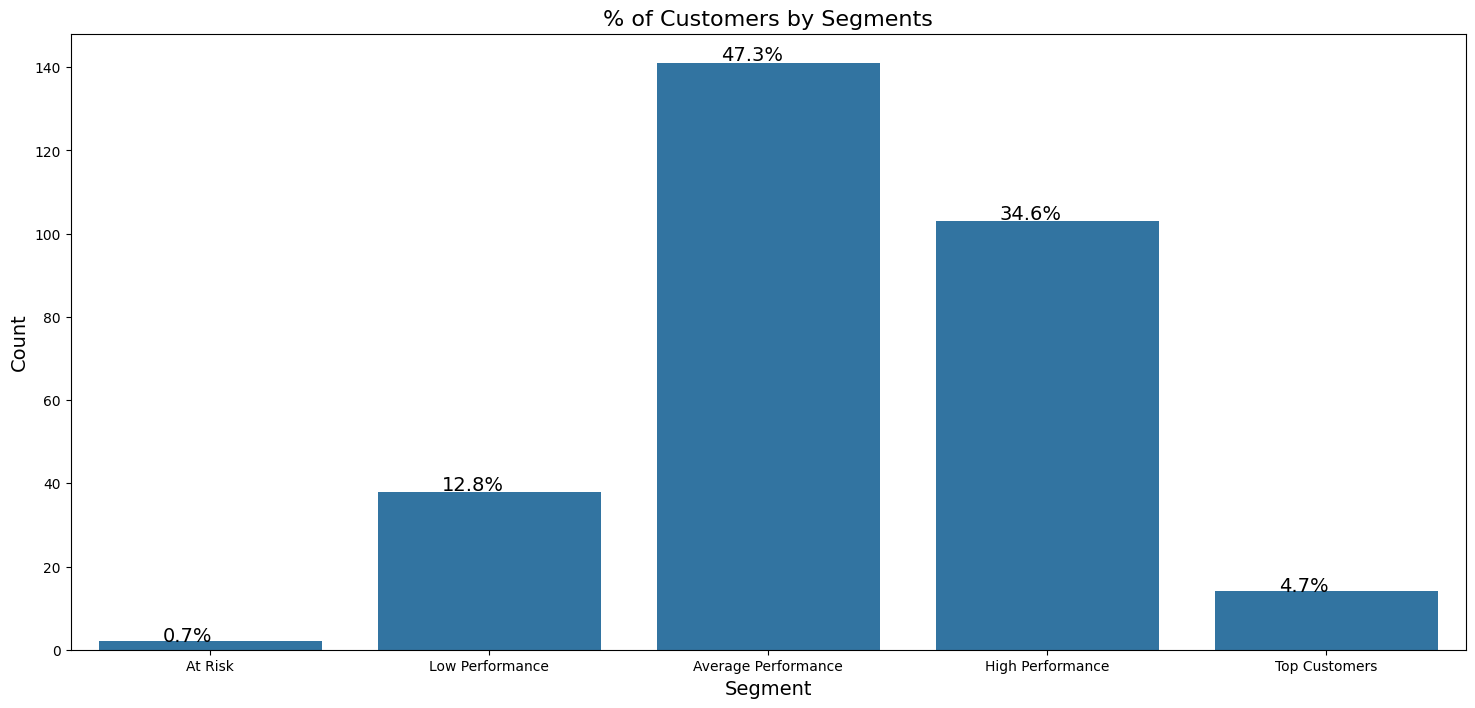

In [ ]:
plt.figure(figsize = (18, 8))
ax = sns.countplot(data_bin,
                   x = 'Segment')
total = len(data_bin.Segment)
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.17
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 14)
plt.title('% of Customers by Segments', size = 16)
plt.xlabel('Segment', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

In [ ]:
under_2 = len(data_bin[data_bin['RFM_Score'] <= 2])

print("Number of customers with RFM score <= 2:", under_2)

Number of customers with RFM score <= 2: 40


In [ ]:
# Inverse transform data_bin
for col in ['Recency', 'Frequency', 'Monetary']:

    x = data_bin[col]

    # Find index
    idx = scaler.feature_names_in_.tolist().index(col)
    max_val = scaler.data_max_[idx]
    min_val = scaler.data_min_[idx]

    data_bin[col] = x*(max_val-min_val) + min_val

<ipython-input-202-0341ac8fdadc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_bin,
<ipython-input-202-0341ac8fdadc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_bin,
<ipython-input-202-0341ac8fdadc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_bin,


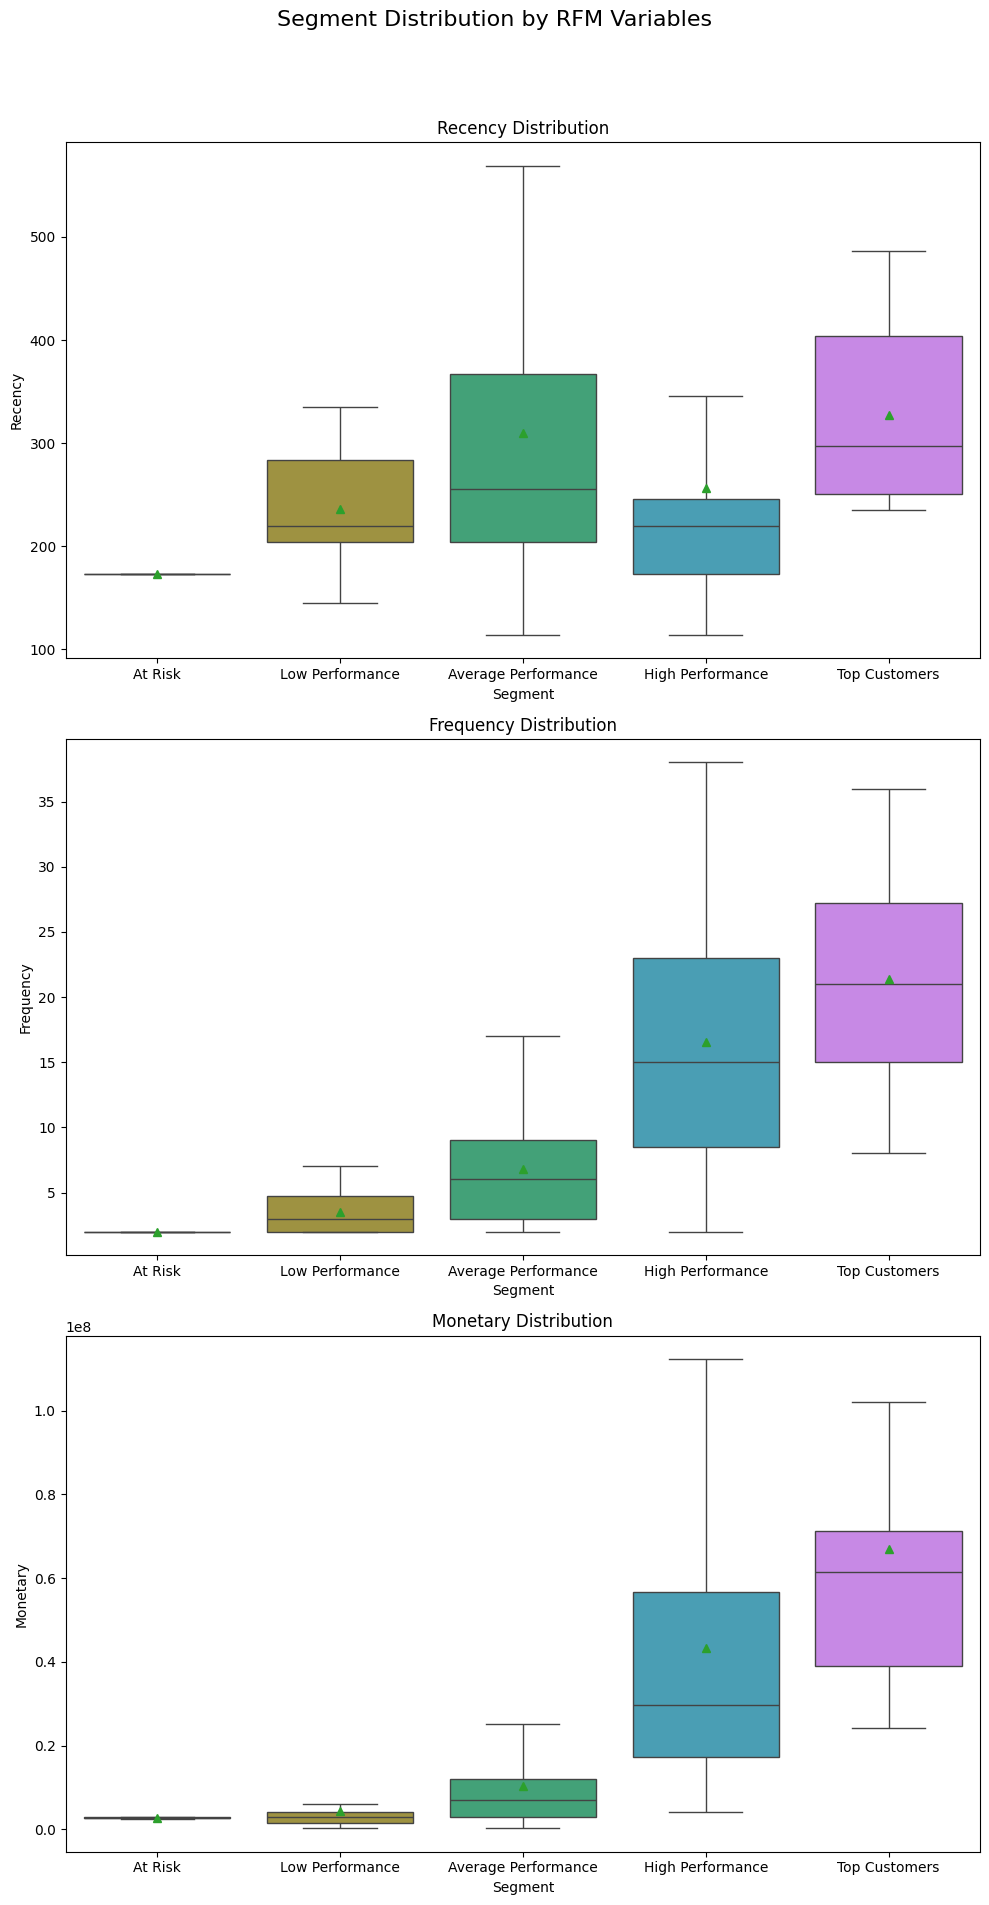

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

colors = sns.color_palette("husl", n_colors=len(data_bin['Segment'].unique()))

for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    sns.boxplot(data=data_bin,
                x='Segment',
                y=col,
                ax=axes[i],
                palette=colors,
                orient='v',  # Vertical
                showmeans=True,  # Show mean
                showfliers=False)  # Hide outliers

    axes[i].set_title(f'{col} Distribution')

# Add title and adjust layout
plt.suptitle('Segment Distribution by RFM Variables', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
data_bin.groupby('Segment').agg({'Recency':'mean',
                                 'Frequency':'mean',
                                 'Monetary':'mean'}).round(2)

,Recency,Frequency,Monetary
Segment,,,
At Risk,173.00,2.00,2722150.00
Low Performance,236.34,3.47,4357989.47
Average Performance,309.40,6.78,10417113.48
High Performance,256.46,16.54,43348021.36
Top Customers,326.93,21.36,67018300.00


In [ ]:
data_bin['Segment'].value_counts()

Average Performance    141
High Performance       103
Low Performance         38
Top Customers           14
At Risk                  2
Name: Segment, dtype: int64

**K-Means Clustering**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
data_cluster_clean = data_clean[['Recency', 'Frequency', 'Monetary']]

In [ ]:
inertia = []

# iterate
for k in range(1, 11):

    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    kmeans.fit(data_cluster_clean)

    inertia.append(kmeans.inertia_)

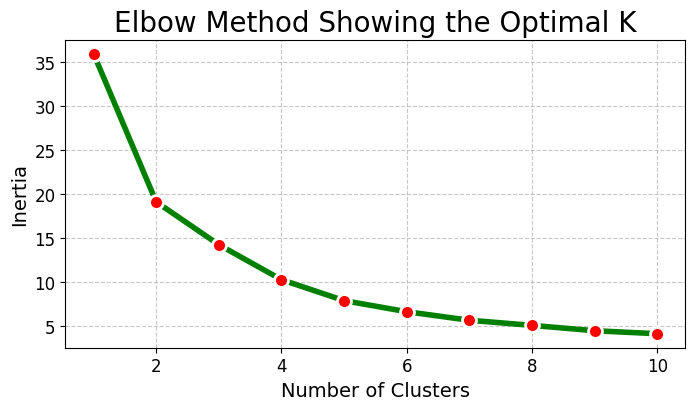

In [ ]:
plt.figure(figsize=(8, 4))

sns.lineplot(x=range(1, 11), y=inertia, color='green',
             linewidth=4, marker='o', markersize=10,
             markerfacecolor='red', markeredgewidth=2)

plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.title('Elbow Method Showing the Optimal K', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


In [ ]:
# Refit best data
kmeans_best = KMeans(n_clusters = 3,
                     random_state = 42,
                     n_init = 10)

kmeans_best.fit(data_cluster_clean)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
data_label = kmeans_best.predict(data_cluster_clean)
data_label

array([0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 2, 0,
       0, 1, 0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0,
       0, 2, 1, 2, 1, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0], dtype=i

In [ ]:
centroids = kmeans_best.cluster_centers_

In [ ]:
centroid_df = pd.DataFrame(centroids,
                           columns=['Recency', 'Frequency', 'Monetary']).rename_axis('Cluster', axis='index')

centroid_df

,Recency,Frequency,Monetary
Cluster,,,
0,0.142392,0.147606,0.077262
1,0.096540,0.596186,0.371830
2,0.501326,0.040052,0.043165


In [ ]:
# Inverse transform data
data_cluster = pd.DataFrame(scaler.inverse_transform(data_clean))
data_cluster.index = data_clean.index
data_cluster.columns = data_clean.columns

data_cluster = data_cluster[['Recency', 'Frequency', 'Monetary']]
data_cluster['label'] = data_label
data_cluster.head()

,Recency,Frequency,Monetary,label
CUST CODE,,,,
AAJ002,173.0,19.0,9246600.0,0
ACH002,234.0,13.0,6549600.0,0
ADI007,934.0,2.0,2255300.0,2
ADI012,298.0,3.0,12500400.0,0
AGU020,296.0,2.0,1173600.0,0


In [ ]:
data_cluster.groupby('label').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'label':'count',
}).round(1)

,Recency,Frequency,Monetary,label
label,,,,
0,243.9,7.3,13282947.3,188
1,202.0,23.5,63017120.9,67
2,571.2,3.4,7526095.3,43


In [ ]:
def assign_label(val):
    if val == 0:
        return 'Average Performance'
    elif val == 1:
        return 'High Performance'
    else:
        return 'Low Performance'

data_cluster['Segment'] = data_cluster['label'].apply(assign_label)

# check result
data_cluster.head()

,Recency,Frequency,Monetary,label,Segment
CUST CODE,,,,,
AAJ002,173.0,19.0,9246600.0,0,Average Performance
ACH002,234.0,13.0,6549600.0,0,Average Performance
ADI007,934.0,2.0,2255300.0,2,Low Performance
ADI012,298.0,3.0,12500400.0,0,Average Performance
AGU020,296.0,2.0,1173600.0,0,Average Performance


<ipython-input-204-e14898c8964f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cluster,
<ipython-input-204-e14898c8964f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cluster,
<ipython-input-204-e14898c8964f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cluster,


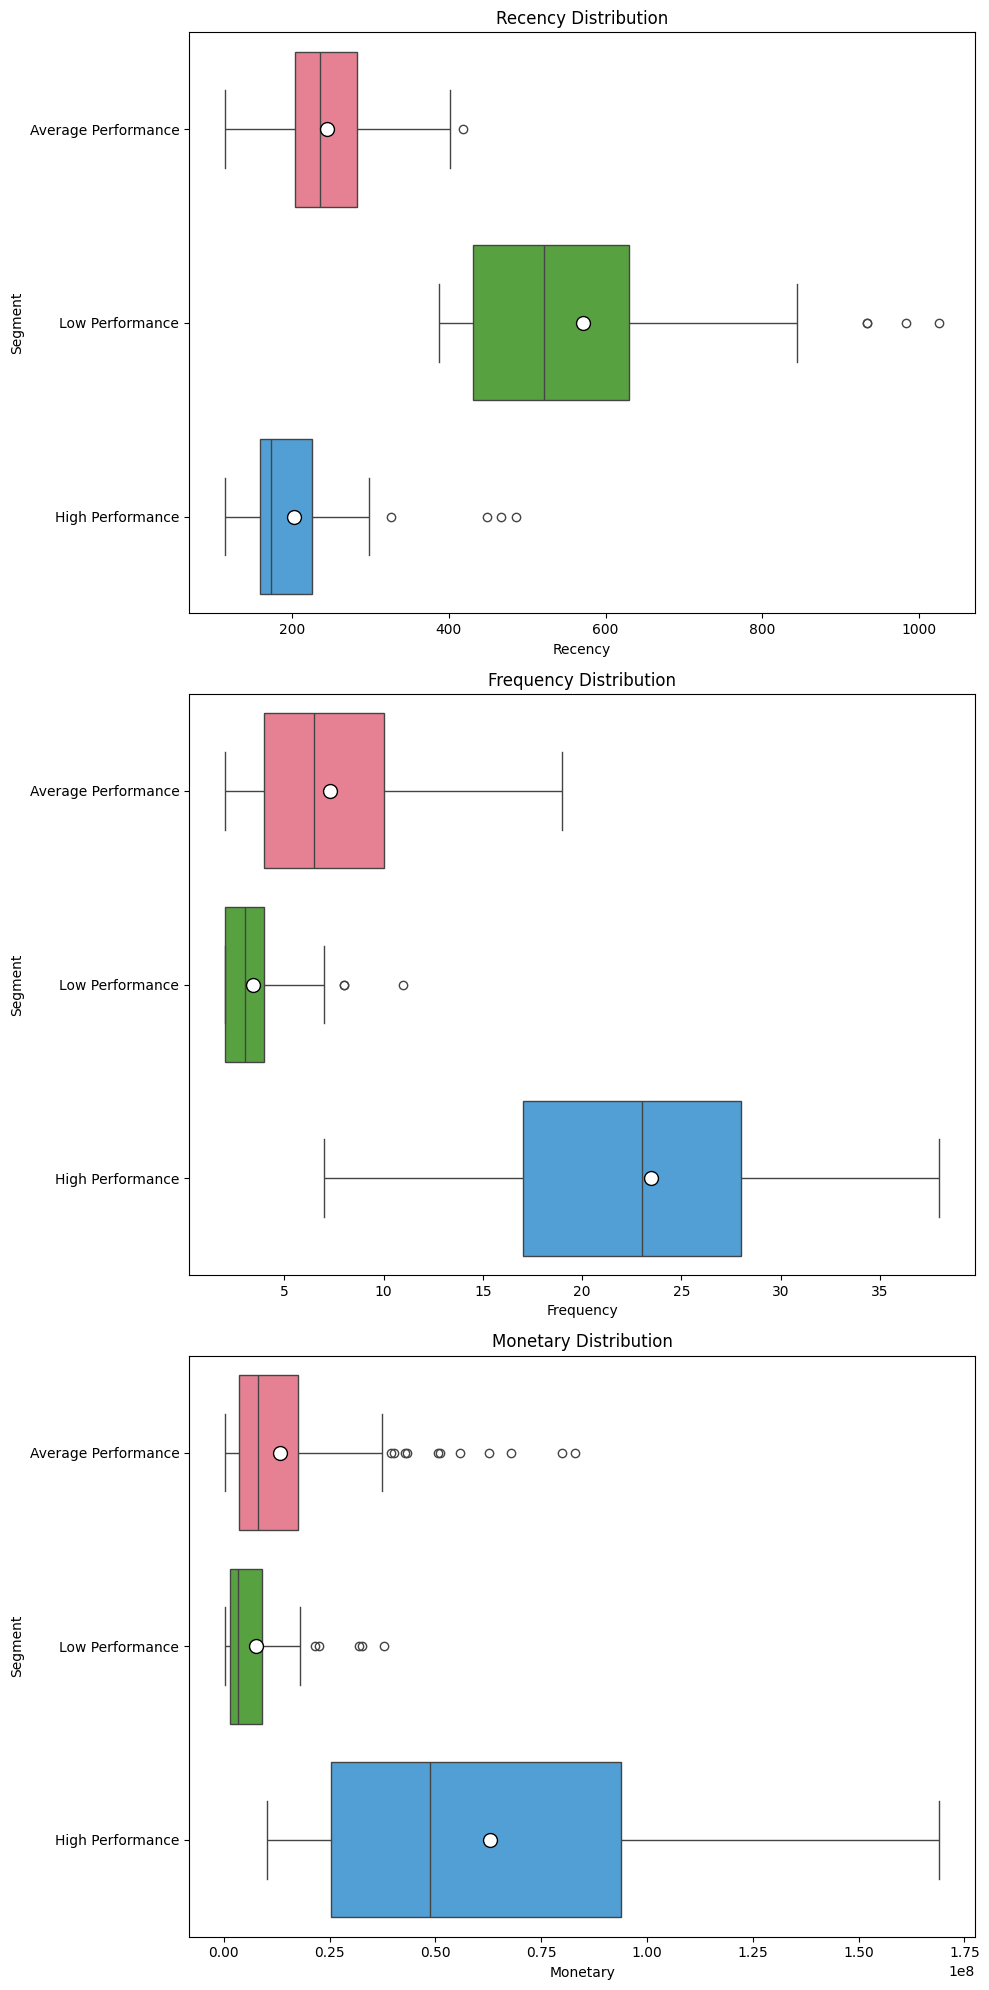

In [ ]:
# Plot
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

colors = sns.color_palette("husl", n_colors=len(data_cluster['Segment'].unique()))

for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    sns.boxplot(data=data_cluster,
                y='Segment',
                x=col,
                ax=axes[i],
                palette=colors,
                showmeans=True,  # Show mean
                meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"})  # Custom marker for mean

    axes[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()


In [ ]:
data_cluster.groupby('Segment').agg({'Recency':'mean',
                                 'Frequency':'mean',
                                 'Monetary':'mean',
                                 'Segment':'count'}).round(2)

,Recency,Frequency,Monetary,Segment
Segment,,,,
Average Performance,243.86,7.31,13282947.34,188
High Performance,202.04,23.46,63017120.90,67
Low Performance,571.21,3.44,7526095.35,43


================ END ================

**COHORT ANALYSIS**

In [ ]:

# def CohortAnalysis(dataframe):
#     data = dataframe.copy()
#     data = data[["CUST CODE", "INVOICE NO", "INVOICE DATE"]].drop_duplicates()
#     data["order_month"] = data["INVOICE DATE"].dt.to_period("M")
#     data["cohort"] = data.groupby("CUST CODE")["INVOICE DATE"].transform("min").dt.to_period("M")

#     cohort_data = data.groupby(["cohort", "order_month"]).agg(n_customers=("CUST CODE", "nunique")).reset_index(drop=False)
#     cohort_data["period_number"] = (cohort_data["order_month"] - cohort_data["cohort"]).apply(lambda x: x.n)
#     cohort_pivot = cohort_data.pivot_table(index="cohort", columns="period_number", values="n_customers")
#     cohort_size = cohort_pivot.iloc[:, 0]
#     retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

#     with sns.axes_style("white"):
#         fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={"width_ratios": [1, 11]})

#         sns.heatmap(retention_matrix, mask=retention_matrix.isnull(), annot=True, cbar=False, fmt=".0%", cmap="coolwarm", ax=ax[1])
#         ax[1].set_title("Monthly Cohorts: User Retention", fontsize=14)
#         ax[1].set(xlabel="# of periods", ylabel="")

#         white_cmap = plt.cm.get_cmap('Greys', 256)
#         white_cmap.set_bad('white')
#         sns.heatmap(pd.DataFrame(cohort_size).rename(columns={0: "cohort_size"}), annot=True, cbar=False, fmt="g", cmap=white_cmap, ax=ax[0])

#         fig.tight_layout()

# CohortAnalysis(eda_data)

**CLV SECTION **


**BG/NBD**

**In Depth Analysis & Recommendation**

In [ ]:

# data_clean_ori = pd.DataFrame(scaler.inverse_transform(data_clean))

# data_clean_ori.index = data_clean.index

# data_clean_ori.columns = data_clean.columns

In [ ]:
data_clean_ori.describe()

,Recency,Frequency,Monetary
count,298.000000,298.000000,2.980000e+02
mean,281.694631,10.385906,2.363411e+07
std,149.135751,8.665622,3.220031e+07
min,114.000000,2.000000,2.382000e+05
25%,204.000000,4.000000,3.733975e+06
50%,235.000000,8.000000,1.156830e+07
75%,323.000000,14.000000,2.701790e+07
max,1026.000000,38.000000,1.690760e+08


Text(0.5, 1.0, 'Recency Distribution')

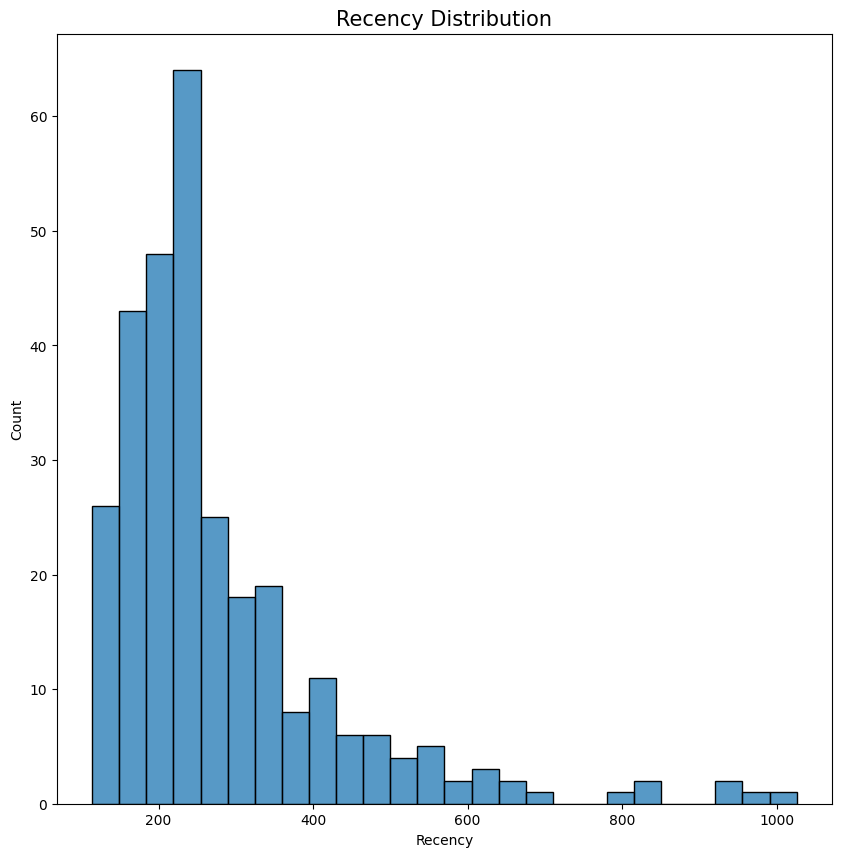

In [ ]:
# Plot recency
plt.figure(figsize=(10,10))
sns.histplot(data_clean_ori['Recency'])
plt.title('Recency Distribution', fontsize=15)


Text(0.5, 1.0, 'Monetary Distribution')

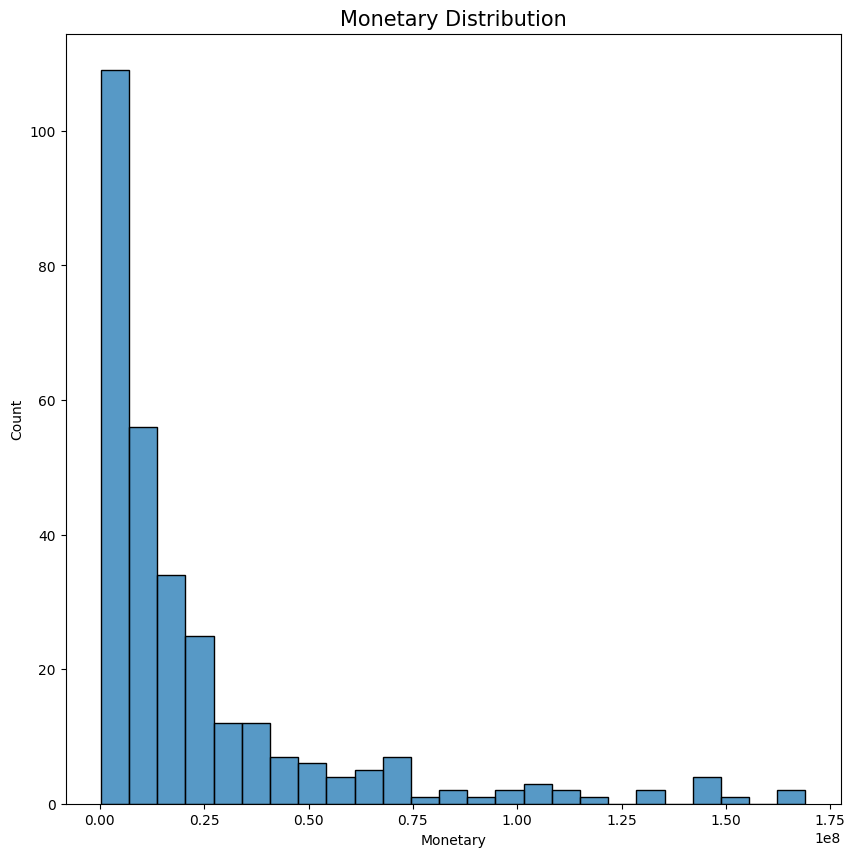

In [ ]:
# Plot monetary
plt.figure(figsize=(10,10))
sns.histplot(data_clean_ori['Monetary'])
plt.title('Monetary Distribution', fontsize=15)
#plt.xlim(0,40000)

Text(0.5, 1.0, 'Frequency Distribution')

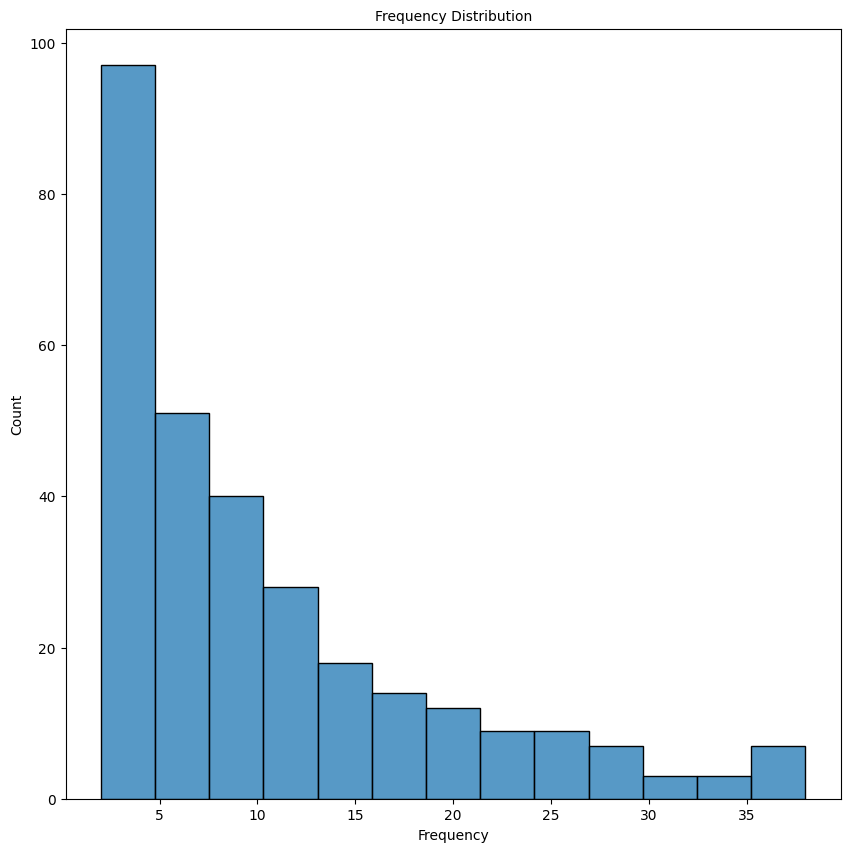

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data_clean_ori['Frequency'])
plt.title('Frequency Distribution', fontsize=10)

In [ ]:
data_cluster.head()

,Recency,Frequency,Monetary,label,Segment
CUST CODE,,,,,
AAJ002,173.0,19.0,9246600.0,0,2. Average Customer
ACH002,234.0,13.0,6549600.0,0,2. Average Customer
ADI007,934.0,2.0,2255300.0,2,3.At Risk Customer
ADI012,298.0,3.0,12500400.0,0,2. Average Customer
AGU020,296.0,2.0,1173600.0,0,2. Average Customer


In [ ]:
rfm_datas_agg = data_cluster.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'label':'count',
}).round(1)

# rename
rfm_datas_agg.columns = ['Recency', 'Frequency', 'Monetary', 'Count Customers']

In [ ]:
rfm_datas_agg

,Recency,Frequency,Monetary,Count Customers
Segment,,,,
1. Best Customer,202.0,23.5,63017120.9,67
2. Average Customer,243.9,7.3,13282947.3,188
3.At Risk Customer,571.2,3.4,7526095.3,43


In [ ]:
rfm_datas_agg['pctg revenue'] = np.round(rfm_datas_agg['Monetary']*rfm_datas_agg['Count Customers']/(rfm_datas_agg['Monetary']*rfm_datas_agg['Count Customers']).sum()*100,2)

#show data
rfm_datas_agg

,Recency,Frequency,Monetary,Count Customers,pctg revenue
Segment,,,,,
1. Best Customer,202.0,23.5,63017120.9,67,59.95
2. Average Customer,243.9,7.3,13282947.3,188,35.46
3.At Risk Customer,571.2,3.4,7526095.3,43,4.59


In [ ]:

customer_segments = data_cluster.copy().reset_index()

customer_segments = customer_segments[['CUST CODE', 'Segment']]

customer_segments.head()

,CUST CODE,Segment
0,AAJ002,2. Average Customer
1,ACH002,2. Average Customer
2,ADI007,3.At Risk Customer
3,ADI012,2. Average Customer
4,AGU020,2. Average Customer
